In [272]:
#Importing numpy library
import numpy as np

In [273]:
#Download Dataset
import urllib
urllib.request.urlretrieve("https://raw.githubusercontent.com/llSourcell/Intro_to_the_Math_of_intelligence/master/data.csv","data.csv")

('data.csv', <http.client.HTTPMessage at 0x1c26155bc50>)

In [274]:
#Read the dataset
import pandas as pd
headers = ['X','Y']
data_csv = pd.read_csv('data.csv', error_bad_lines=False, names=headers)
data_csv.head(10)

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
5,55.142188,78.211518
6,52.211797,79.641973
7,39.299567,59.171489
8,48.105042,75.331242
9,52.550014,71.300880


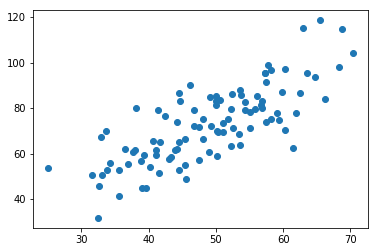

In [275]:
# Plotting the dataset
import matplotlib.pyplot as plt
x = data_csv['X']
y = data_csv['Y']


#Converting them into numpy array
X = np.array(x)
Y = np.array(y)

plt.scatter(X,Y)
plt.show()


Line equation : 
y = m * x + c 

y = output
m = slope  = (y2 - y1)/(x2 - x1)
c = y-intercept


Now our goal is to create a hypothesis function that can actually predict the value Y based on given X

Error = Y (output) - Y(predicted)

Means Squared error = 1/2 * (Y(output) - Y(predicted))^2

1/2 is taken to reduce the computational complexity

Derivates of Error with respect to m and c 


Recap of calculus - power rule y = x^n then dy/dx = n*x^(n-1)           - 1
                  -            y = f(g(x))  then dy/dx = f'(g(x))*g'(x) - 2 
                               x = constant then dy/dx = 0              - 3   
                               y = x  then dy/dx = 1                    - 4
                               
                               
Gradient are used to identify rate of change of output with respect to change in particular variable
y(predicted) = y = m*x + c , here y(output) is constant

Mean square error 

Error = 1/2 *( y(output) - y(predicted))^2
      = 1/2 *( y(output) - (m * x + c))^2
      
      
Applying derivaties with respect to m and c on error function

d(Error)/d(m) = 2 * (1/2 * (y(output) - (m * x + c)))     y(output) is constant

              =   -1 * (m * x + c ) * d(m* x +c)/d(m)   rule no : 2
              =  -1 *(y- (m*x+c))* x
                                       
 m_gradient   = -x*(m*x + c)
              
d(Error)/d(c) = 2 * (1/2 *( y(output) - (m * x + c))
              = -(y - (m * x + c))  
 
 c_gradient  = -(y- (m*x+c))
 
 
 #sum it up 
 m_gradient   = -x*(y -(m*x + c))
 c_gradient  = -(y -(m*x+c))
 
 # updated gradient values 
 
 learning_rate = rate at  which the change will be added taken into by multiplying with gradient (eg: 0.01)
 
 m_updated_Value = m_original - (learning_rate * m_gradient)
 c_updated_value = c_original - (learning_rate * c_gradient)
 


In [276]:
#initialize m and c
m = 0
c = 0



Pseudo code for Gradient decent
1. Read  x and y variable
2. Initalize random values for m and c
3. For i in range(iterations)
     get value of y using m and c
     check error value
     update value of m and c
     repeat 


In [277]:
# taking iterations of 10000
iterations = 100

In [278]:
#setting the learning rate
learning_rate = 0.0001

In [279]:
def caliculate_error(x, y, m, c):
    y_predicted = m * x + c 
    error = (1/2)*((y - y_predicted)**2)
    error = np.mean(error)
    return  error

    

In [280]:
def update_value(x,m,c,y, learning_rate):
    m_gradient = -x*(y - (m*x + c))
    c_gradient = -(y - (m*x+c))
    m_new  = m - (learning_rate*m_gradient)
    c_new  = c - (learning_rate*c_gradient)

    return np.mean(m_new), np.mean(c_new)

In [281]:
loss_values = []

In [282]:
# Extract M and C values 
for i in range(iterations):
    loss_values.append(caliculate_error(X,Y,m,c))
    m_new, c_new = update_value(X,m,c,Y, learning_rate)
    m = m_new
    c = c_new
    
print(m)
print(c)

1.47886174167
0.0320719151316


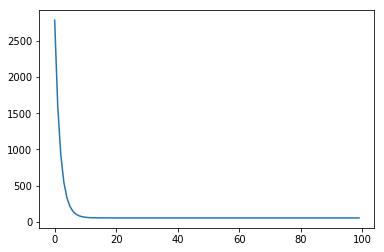

In [283]:
#plotting the loss_values

plt.plot(loss_values)
plt.show()

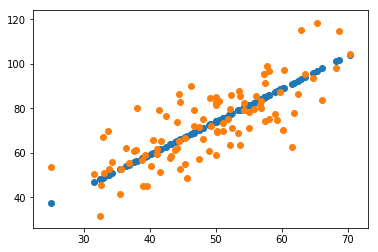

In [284]:
#plot line with the updated values 

Y_latest = (X*m + c)

plt.scatter(X,Y_latest)
plt.scatter(X,Y)

plt.show()